In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# LIbreria de arboles:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report, confusion_matrix

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
#url = 'D:\Cursos\CienciaDeDatosPython\Datos\processed.cleveland.data'
datos = pd.read_csv(url, header = None)

datos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
print('Dimensiones del dataframe: ', datos.shape)

Dimensiones del dataframe:  (303, 14)


In [10]:
print('Cantidad de datos nulos por columma:')
datos.isnull().sum()

Cantidad de datos nulos por columma:


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# Reemplazar datos erroneos en las colummnas 11 y 12
datos[11] = datos[11].replace('?',0.0)
datos[12] = datos[12].replace('?',0.0)

In [23]:
# cabiar el tupo de datos de las colummnas 11 y 12

datos[11] = datos[11].astype('float64')
datos[12] = datos[12].astype('float64')


In [ ]:
# SI hubiese datos nulos::::
#datos.dropna(inplace=True)

In [24]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,-1]
X.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X.head()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: 13, dtype: int64

In [25]:
# Dividir conjunto de entrenamiento y  prueba::.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
X_test_com_prediccion = X_test.copy()
X_test_com_prediccion['prediccion'] = y_pred
X_test_com_prediccion['valor_real'] = y_test

In [30]:
print("Predicciones vs Varoable objetivo")
print(X_test_com_prediccion.head(10))

Predicciones vs Varoable objetivo
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
179  53.0  1.0  3.0     130.0  246.0  1.0      2.0    173.0    0.0      0.0   
228  54.0  1.0  4.0     110.0  206.0  0.0      2.0    108.0    1.0      0.0   
111  56.0  1.0  4.0     125.0  249.0  1.0      2.0    144.0    1.0      1.2   
246  58.0  1.0  4.0     100.0  234.0  0.0      0.0    156.0    0.0      0.1   
60   51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0      1.2   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
119  65.0  1.0  4.0     135.0  254.0  0.0      2.0    127.0    0.0      2.8   
223  53.0  1.0  4.0     123.0  282.0  0.0      0.0     95.0    1.0      2.0   
268  40.0  1.0  4.0     152.0  223.0  0.0      0.0    181.0    0.0      0.0   
33   59.0  1.0  4.0     135.0  234.0  0.0      0.0    161.0    0.0      0.5   

     slope   ca  thal  prediccion  valor_real  
179    1.0  3.0   3.0           0           0  


# Metricas para evaluar el modelo

In [41]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))

metrica = accuracy_score(y_test, y_pred)
print('Metrica: ', round(metrica,2))

print('::::::::  Clasificacion  :::::::: ')
print(classification_report(y_test, y_pred))

Error porcentual : 167.213115
Metrica:  0.49
::::::::  Clasificacion  :::::::: 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.38      0.42      0.40        12
           2       0.25      0.22      0.24         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.30      0.31      0.31        61
weighted avg       0.49      0.49      0.49        61



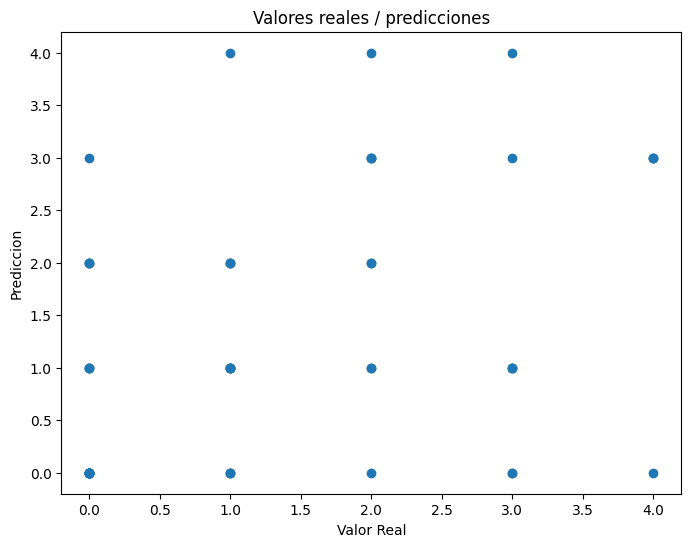

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_com_prediccion['valor_real'], X_test_com_prediccion['prediccion'])
plt.xlabel('Valor Real')
plt.ylabel('Prediccion')
plt.title('Valores reales / predicciones')
plt.show()

Segun la dispercion de los datos entre los valores de prediccion y los valores reales, se determina que le modelo tine deificultades para predecir datos correctaente

In [42]:
print(confusion_matrix(y_test, y_pred))

[[22  3  3  1  0]
 [ 3  5  3  0  1]
 [ 1  2  2  3  1]
 [ 2  3  0  1  1]
 [ 1  0  0  3  0]]
